In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv(r'D:\task\mxmh_survey_results.csv')

In [4]:
df.head(2)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.


In [5]:
uniq_st = df['Primary streaming service'].unique()
print(uniq_st)

['Spotify' 'Pandora' 'YouTube Music' 'I do not use a streaming service.'
 'Apple Music' 'Other streaming service' nan]


64.42141623488774


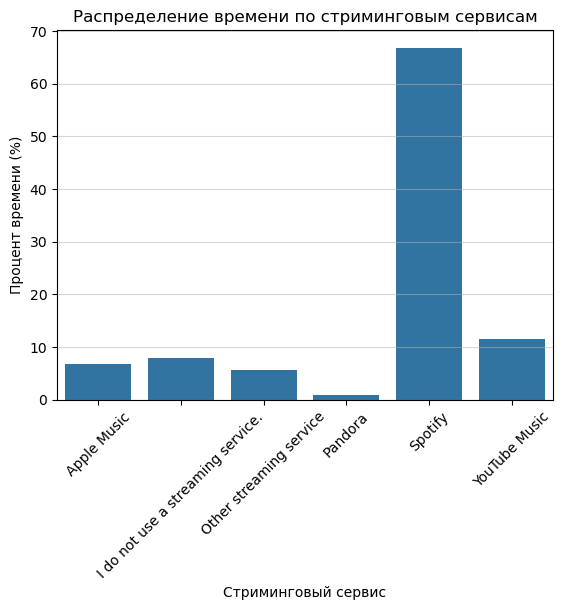

In [6]:
ser_hours = df.groupby('Primary streaming service')['Hours per day'].sum()
all_hours = df['Hours per day'].sum()
percentages = (ser_hours / all_hours * 100).round(1).reset_index()
percentages.columns = ['Primary streaming service', 'Percentage']

c = sns.barplot(data=percentages, 
                x='Primary streaming service', 
                y='Percentage')
c.set_title('Распределение времени по стриминговым сервисам')
c.set_ylabel('Процент времени (%)')
c.set_xlabel('Стриминговый сервис')
c.tick_params(axis='x', rotation=45)
c.grid(axis='y', alpha=0.5)

work_data = df[df['While working'] == 'Yes']
spotify = (work_data['Primary streaming service'] == 'Spotify').mean() * 100
print(spotify)

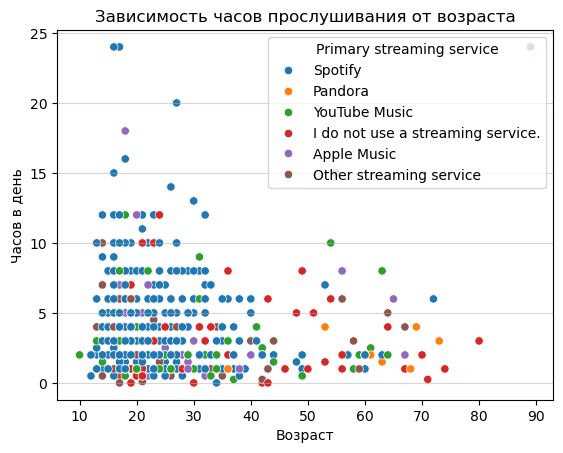

In [7]:
v = sns.scatterplot(
                data=df, 
                x="Age", 
                y="Hours per day", 
                hue="Primary streaming service")
v.set_title('Зависимость часов прослушивания от возраста')
v.set_xlabel('Возраст')
v.set_ylabel('Часов в день')
v.grid(axis='y', alpha=0.5)

2.0826840614391386


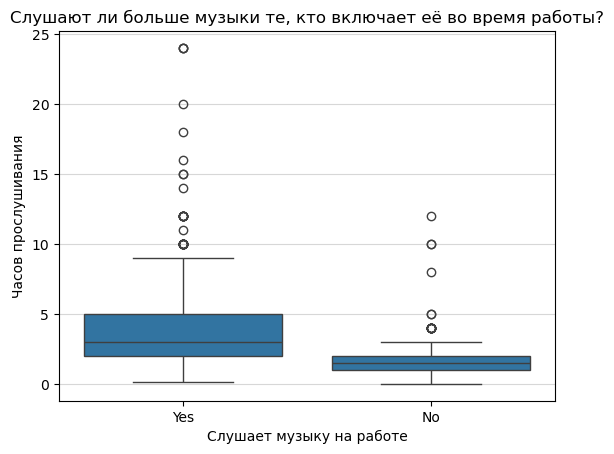

In [8]:
z = sns.boxplot(data=df, 
                x='While working', 
                y='Hours per day')
z.set_title('Слушают ли больше музыки те, кто включает её во время работы?')
z.set_xlabel('Слушает музыку на работе')
z.set_ylabel('Часов прослушивания')
z.grid(axis='y', alpha=0.5)


work_hours = df[df['While working'] == 'Yes']['Hours per day'].mean()
no_work_hours = df[df['While working'] == 'No']['Hours per day'].mean()
ratio = work_hours / no_work_hours
print(ratio)

Age_Group
0-18     153
19-25    356
26-35    129
36-45     41
46-55     16
56+       41
Name: count, dtype: int64
25.206802721088437


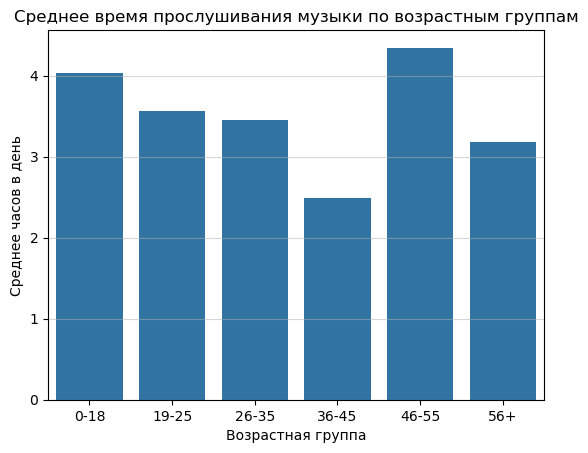

In [9]:
def get_age_group(age):
    if 0 <= age < 18:
        return '0-18'
    elif 18 <= age <= 25:
        return '19-25'
    elif 26 <= age <= 35:
        return '26-35'
    elif 36 <= age <= 45:
        return '36-45'
    elif 46 <= age <= 55:
        return '46-55'
    elif age >= 56:
        return '56+'
    else:
        return '56+'

df['Age_Group'] = df['Age'].apply(get_age_group)
age_order = ['0-18', '19-25', '26-35', '36-45', '46-55', '56+']
x = sns.barplot(data=df, 
                x='Age_Group', 
                y='Hours per day', 
                errorbar=None, 
                order=age_order)
x.set_title('Среднее время прослушивания музыки по возрастным группам')
x.set_xlabel('Возрастная группа')
x.set_ylabel('Среднее часов в день')
x.grid(axis='y', alpha=0.5)

print(df['Age_Group'].value_counts().sort_index())
print(df['Age'].mean())

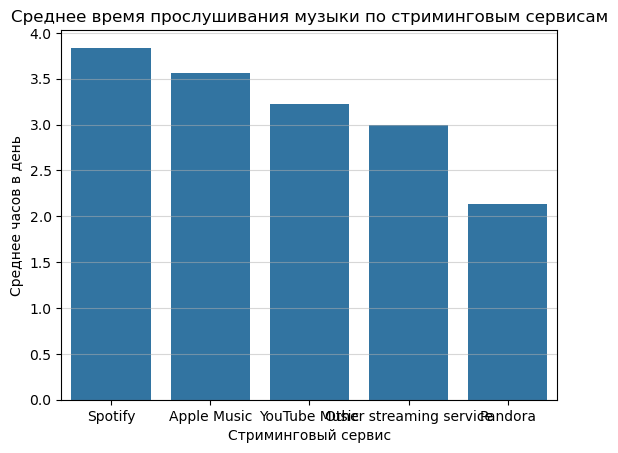

In [10]:
streaming_stats = df.groupby('Primary streaming service')['Hours per day'].agg(['mean'])
streaming_stats = streaming_stats.drop('I do not use a streaming service.', errors='ignore')
streaming_stats = streaming_stats.sort_values('mean', ascending=False)
plot_data = streaming_stats.reset_index()

g = sns.barplot(data=plot_data, x='Primary streaming service', y='mean')
g.set_title('Среднее время прослушивания музыки по стриминговым сервисам')
g.set_ylabel('Среднее часов в день')
g.set_xlabel('Стриминговый сервис')
g.grid(axis='y', alpha=0.5)

In [11]:
Выводы :
#1. В 64% случаев, если участник опроса слушает музыку на работе, он отдает предпочтение Spotify
#2. Молодые пользователи (до 30 лет) имеют более широкий разброс в часах прослушивания и чаще используют Spotify, в то время как пользователи старшего возраста могут иметь другие предпочтения при выборе сервиса в среднем тратят меньшее количество часов на прослушивание музыки.
#3. Люди, которые слушают музыку во время работы, в среднем больше в 2,1 раза больше времени слушают музыку, чем люди, которые слушают ее вне работы. 
#4. По среднему времени прослушивания лидирует Spotify. 
# Общий итог: Spotify имеет самый большой охват аудитории среди молодежи, с самым большим удержанием в части длительности сессии. По графику 4 видно, что возрастная группа 36-45 слушает музыки меньше, чем остальные рассмотренные группы, следовательно, по данной группе есть потенциал для роста.
# При этом, хочется отметить, что данные по среднему прослушиванию по возрастным группам не совсем корректны, т.к. средний возраст опрошенных ~25 лет, количество опрошенных в группах, старше 35 лет не достаточно велико, что бы выявить закономерность.


SyntaxError: invalid syntax (1007457910.py, line 1)